In [36]:
from scipy.fft import fft, fftfreq
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from src.data_loader import load_training_data
from src.preprocessing import notch_filter, bandpass_filter, highpass_filter
import config

In [ ]:
def plot_PSD(x, fs):
    f, Pxx_den = signal.welch(x, fs,nperseg=500)
    plt.semilogy(f, Pxx_den)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.show()

In [3]:
def plot_fft(signal, fs):
    # Number of sample points
    N = len(signal)
    # sample spacing
    T = 1/fs
    yf = fft(signal)
    xf = fftfreq(N, T)[:N//2]
    import matplotlib.pyplot as plt
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.grid()
    plt.show()

In [25]:
def plot_freq_response(b,a,fs=125):
    w, h = signal.freqz(b, a, worN=8000)
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    frequencies_hz = w * fs / (2 * np.pi)
    ax.plot(frequencies_hz, 20 * np.log10(abs(h)))
    ax.grid(True, which='both', linestyle='-', alpha=0.5)
    ax.set_ylim(-30)
    plt.show()

In [4]:
edf_file = "../data/training/R2.edf"
xml_file = "../data/training/R2.xml"
multi_channel_data, labels, info = load_training_data(
            edf_file, xml_file
        )

Loading training data from ../data/training/R2.edf and ../data/training/R2.xml...


c:\Users\filip\OneDrive\Dokument\GitHub\cm2013_ht25_project\Python\src\data_loader.py:56: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = mne.io.read_raw_edf(edf_file_path, preload=True, verbose=False)


Identified channels:
  EEG: ['EEG(sec)', 'EEG']
  EOG: ['EOG(L)', 'EOG(R)']
  EMG: ['EMG']
125.0
  EEG: 2 channels, 3750 samples/epoch, 125.0 Hz
125.0
  EOG: 2 channels, 3750 samples/epoch, 125.0 Hz
125.0
  EMG: 1 channels, 3750 samples/epoch, 125.0 Hz

Loaded 1078 epochs (8.98 hours)
Sleep stage distribution:
  Wake: 716 epochs (66.4%)
  N1: 3 epochs (0.3%)
  N2: 238 epochs (22.1%)
  N3: 61 epochs (5.7%)
  REM: 61 epochs (5.7%)


In [34]:
eeg_data = multi_channel_data["eeg"]
flattened_data = eeg_data[:,1,:].flatten()
padding = np.zeros(100_000)
padding = np.zeros(100_000)
flattened_data = np.append(flattened_data,padding)
flattened_data = np.append(padding, flattened_data)
print(flattened_data)



[0. 0. 0. ... 0. 0. 0.]


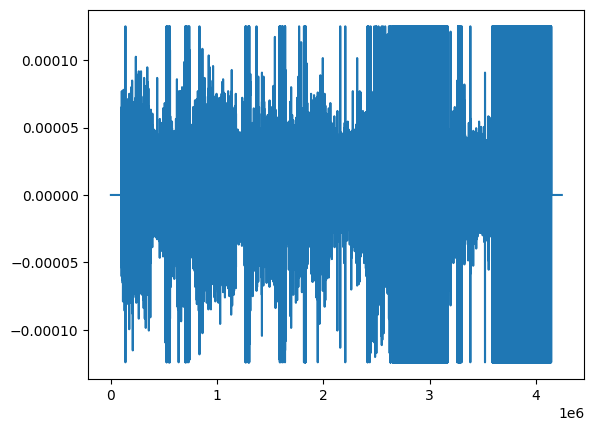

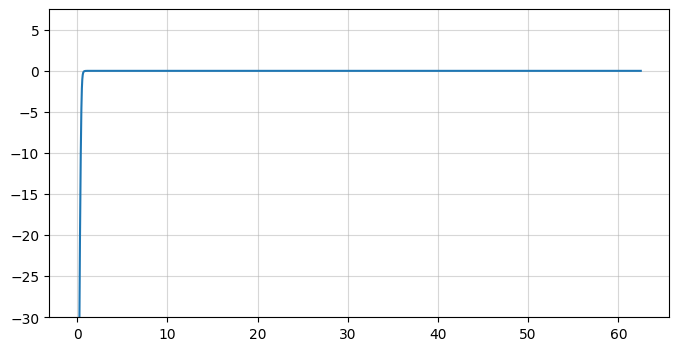

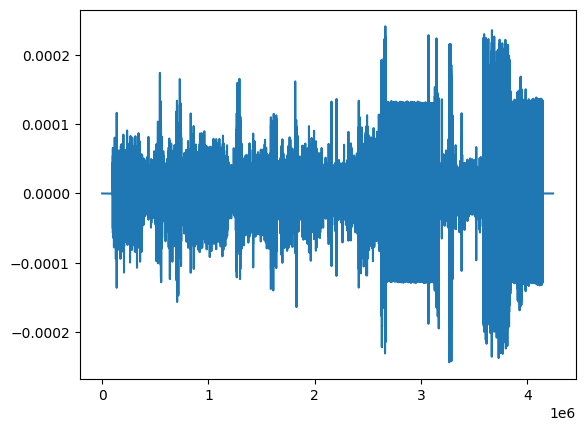

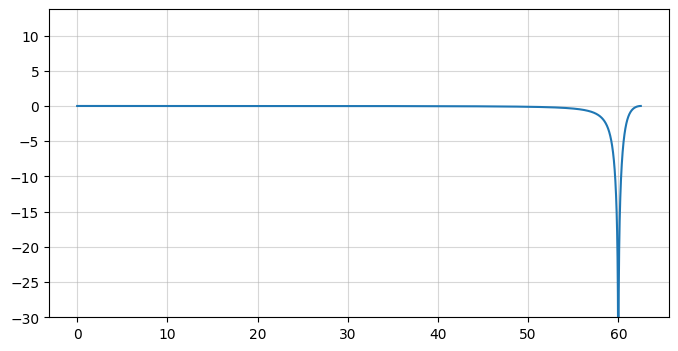

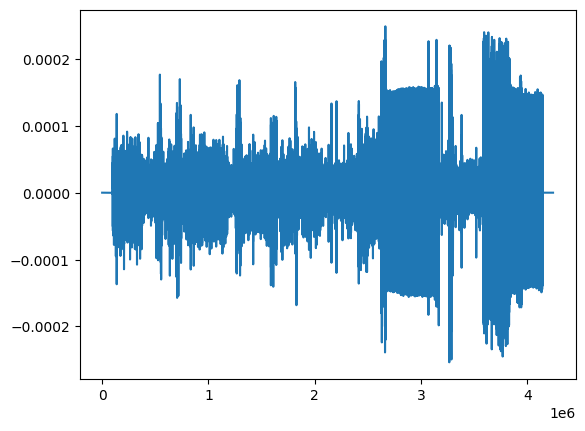

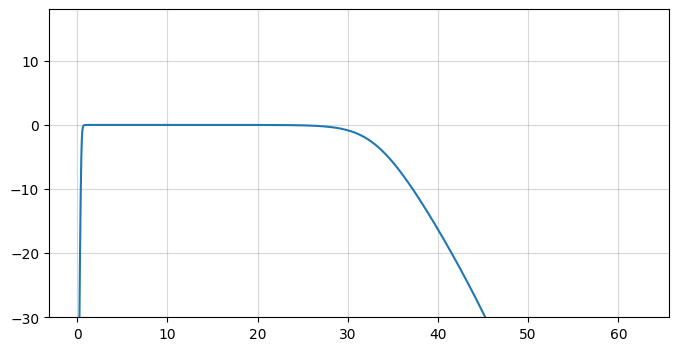

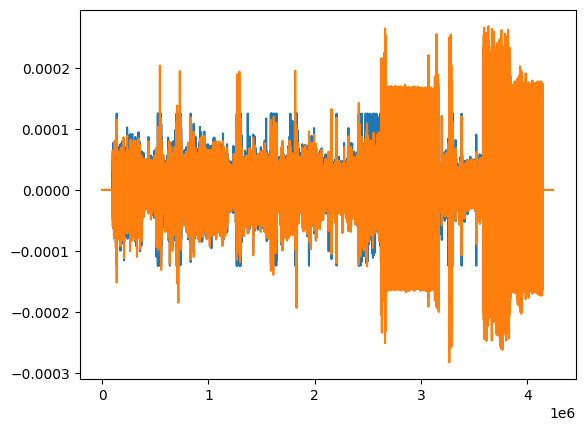

In [39]:
# Apply EEG-specific preprocessing
#plot_PSD(flattened_data,125)
filtered_signal = flattened_data
plt.plot(filtered_signal)
filtered_signal,b,a = highpass_filter(filtered_signal,0.5,125,order=5)
plot_freq_response(b,a)
plt.plot(filtered_signal)
#plot_PSD(filtered_signal, fs = 125)
filtered_signal,b,a = notch_filter(filtered_signal, 60, 30, 125)
plot_freq_response(b,a)
plt.plot(filtered_signal)
#plot_PSD(filtered_signal, fs = 125)
filtered_signal,b,a = bandpass_filter(filtered_signal, 0.5, 33 , 125, config.BANDPASS_FILTER_ORDER)
plot_freq_response(b,a)
#plot_PSD(filtered_signal, fs = 125)
plt.plot(flattened_data)
plt.plot(filtered_signal)



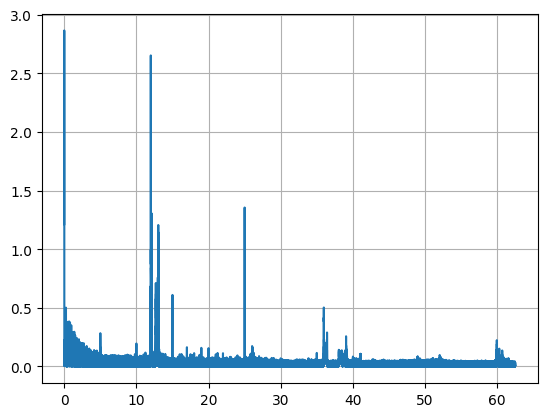

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [7]:
plot_fft(flattened_data,125)
filtered_signal = highpass_filter(flattened_data,0.5,125,order=5)
plot_fft(filtered_signal, fs = 125)
filtered_signal = notch_filter(filtered_signal, 60, 20, 125)
plot_fft(filtered_signal, fs = 125)
filtered_signal = bandpass_filter(filtered_signal, config.BANDPASS_FILTER_LOWER_FREQ, 35, 125, config.BANDPASS_FILTER_ORDER)
plot_fft(filtered_signal, fs = 125)


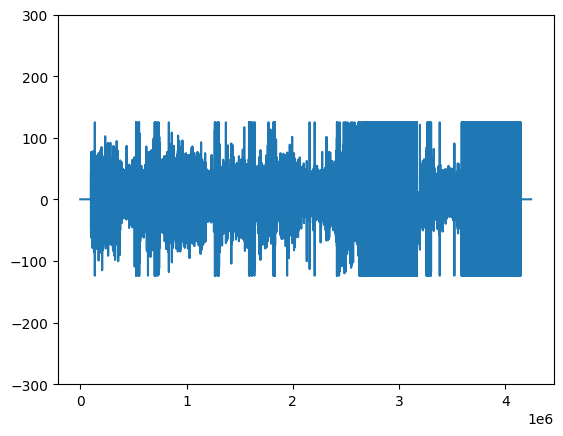

In [8]:
plt.ylim(-300,300)
plt.plot(flattened_data)


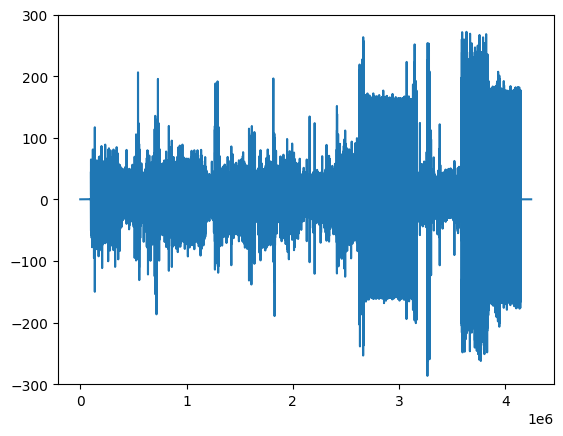

In [11]:

plt.ylim(-300,300)
plt.plot(filtered_signal)
